In [1]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
import pandas as pd

df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')
facebook_fake = pd.read_csv('facebook-fact-check.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
facebook_fake.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [5]:
df_true.shape, df_fake.shape,facebook_fake.shape

((21417, 4), (23481, 4), (2282, 12))

In [6]:
df_true['class']=1
df_fake['class']=0

We merge our 2 datasets of real news and fake news with a new feature depicting which news is real news and which are fake

In [7]:
merged_df = pd.concat([df_true,df_fake])

In [8]:
merged_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


After the merge we want to check the features to see if any contain NaN which can throw our model off below we can see there are no NaN within our dataset

In [9]:
merged_df.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

After the merge we need to check the balance between our dataset between real and fake, because if one is significantly larger than the other we can overfit to our data

/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

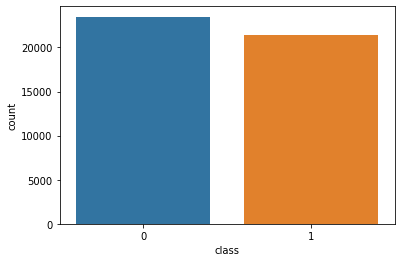

In [10]:
import seaborn as sns
sns.countplot(merged_df['class'])

In [11]:
sample_news_df = merged_df.sample(10000, random_state=786).reset_index(drop=True)
sample_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10000 non-null  object
 1   text     10000 non-null  object
 2   subject  10000 non-null  object
 3   date     10000 non-null  object
 4   class    10000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


We would now need to initilize the training environment that creates teh transformation pipline. This setup needs to be called before we train or execute and function 

In [12]:
sample_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


In [13]:
from pycaret.nlp import *

news_nlp = setup(data = sample_news_df, target = 'text', session_id =123)

Description,Value
session_id,123
Documents,10000
Vocab Size,41637
Custom Stopwords,False


In [14]:
%time
lda = create_model('lda',multi_core=True)

In [15]:
%time
lda_df = assign_model(lda)

In [16]:
plot_model(lda, plot = 'topic_distribution')

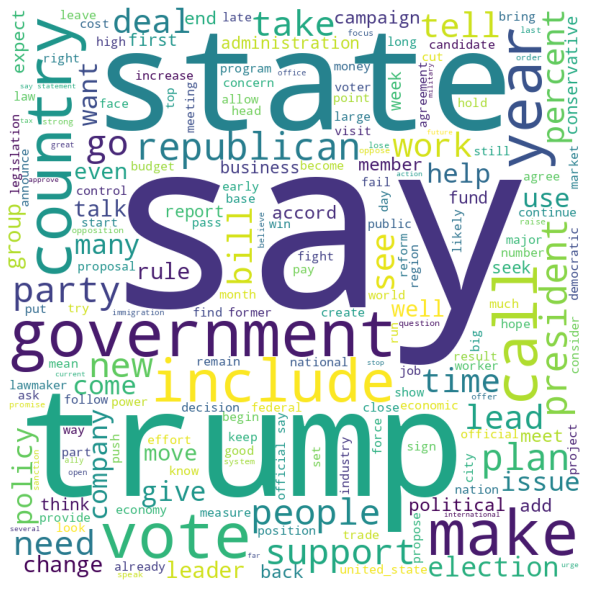

In [17]:
plot_model(lda, plot = 'wordcloud')

In [18]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.142153 -0.089606       1        1  35.591792
0     -0.070358  0.121100       2        1  26.423419
1      0.105415 -0.124214       3        1  19.266486
2      0.107096  0.092720       4        1  18.718303, topic_info=           Term          Freq         Total Category  logprob  loglift
79          say  36737.000000  36737.000000  Default  30.0000  30.0000
551      police   2561.000000   2561.000000  Default  29.0000  29.0000
444    military   2528.000000   2528.000000  Default  28.0000  28.0000
199  government   6372.000000   6372.000000  Default  27.0000  27.0000
96        trump  12135.000000  12135.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
479      accord   1050.980106   3125.564395   Topic4  -5.6764   0.5858
357        make   1070.741696   8117.312352   Topic4  -5.6578  -0.3500
814        work    914.706856   3867.574863   Topic4  -5.8153   0.2339
92         tell    920.878786   5873.949268   Topic4  -5.8086  -0.1773
321        year    906.865264   6328.076014   Topic4  -5.8239  -0.2671

[373 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
479       1  0.191325      accord
479       2  0.252434      accord
479       3  0.220120      accord
479       4  0.336259      accord
2         1  0.895092    actually
...     ...       ...         ...
9939      4  0.991230  wrongdoing
321       1  0.239093        year
321       2  0.420349        year
321       3  0.197216        year
321       4  0.143330        year

[753 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [19]:
plot_model(lda, plot = 'bigram')

After the observations of these models we need to create the dataframe the model will be learning off of. In this case we just want the models to be learning of whether or not the data row is a truthful article or fake any other additional information would be unnecessary data that will just confuse the model especially since the other data types are text based data while our class indicator is only 0 and 1

In [20]:
lda_df.drop(['text','title','subject','date'],axis = 1, inplace=True, errors='ignore')

In [21]:
from pycaret.classification import *

%time
setup(data=lda_df, target='class', silent = True, use_gpu = True)

,Description,Value
0,session_id,5967
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


(False,
 False,
 False,
 'lightgbm',
 {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'dashboard_logger',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierCont

In [22]:
%time

top5Models = compare_models(sort= 'Accuracy', n_select = 16)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8711,0.9429,0.8596,0.8706,0.8650,0.7417,0.7420,0.9510
rf,Random Forest Classifier,0.8696,0.9380,0.8513,0.8742,0.8625,0.7384,0.7389,0.4520
ada,Ada Boost Classifier,0.8684,0.9394,0.8543,0.8698,0.8618,0.7362,0.7365,0.3300
lightgbm,Light Gradient Boosting Machine,0.8680,0.9422,0.8522,0.8704,0.8611,0.7353,0.7357,0.0690
svm,SVM - Linear Kernel,0.8653,0.0000,0.8567,0.8626,0.8594,0.7301,0.7304,0.0280
lr,Logistic Regression,0.8638,0.9356,0.8561,0.8601,0.8579,0.7272,0.7274,0.0510
ridge,Ridge Classifier,0.8616,0.0000,0.8576,0.8550,0.8561,0.7227,0.7229,0.0140
lda,Linear Discriminant Analysis,0.8616,0.9344,0.8576,0.8550,0.8561,0.7227,0.7229,0.0190
et,Extra Trees Classifier,0.8580,0.9328,0.8433,0.8589,0.8509,0.7153,0.7157,0.4250
knn,K Neighbors Classifier,0.8553,0.9159,0.8463,0.8518,0.8489,0.7100,0.7102,0.0720


Using pycaret's compare_model function we are easily able to observe how accurate different models are with the data frame we set up in the cell above and see different metrics each of the models have. We can use this to observe the results vs having to train different models in separate lines.

In [23]:
predict_model(top5Models[0],data=lda_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8832,0.9515,0.8718,0.8818,0.8768,0.7658,0.7658


,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic,Label,Score
0,0,0.145600,0.085426,0.002188,0.766785,Topic 3,0.77,0,0.8933
1,0,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25,0,0.9602
2,1,0.847066,0.047471,0.000815,0.104649,Topic 0,0.85,1,0.9082
3,1,0.052074,0.173432,0.476422,0.298071,Topic 2,0.48,0,0.7835
4,1,0.424667,0.450455,0.123204,0.001673,Topic 1,0.45,1,0.9662
...,...,...,...,...,...,...,...,...,...
9995,0,0.001397,0.095166,0.504621,0.398817,Topic 2,0.50,0,0.9307
9996,0,0.692815,0.001555,0.001605,0.304025,Topic 0,0.69,0,0.5765
9997,0,0.001503,0.001497,0.497203,0.499796,Topic 3,0.50,0,0.9414
9998,1,0.002280,0.993180,0.002289,0.002250,Topic 1,0.99,1,0.9676


In [24]:
predict_model(top5Models[5])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8650,0.9348,0.8646,0.8494,0.8569,0.7292,0.7293


,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,class,Label,Score
0,0.012763,0.034846,0.443326,0.509065,0.51,0.0,0.0,0.0,1.0,0,0,0.9125
1,0.988774,0.003764,0.003720,0.003742,0.99,1.0,0.0,0.0,0.0,1,1,0.9903
2,0.732552,0.009459,0.134694,0.123294,0.73,1.0,0.0,0.0,0.0,1,1,0.9018
3,0.166567,0.803008,0.001453,0.028971,0.80,0.0,1.0,0.0,0.0,1,1,0.9242
4,0.003001,0.092194,0.901796,0.003009,0.90,0.0,0.0,1.0,0.0,1,1,0.7224
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.002259,0.438355,0.002221,0.557166,0.56,0.0,0.0,0.0,1.0,1,0,0.8404
2997,0.426645,0.001899,0.001874,0.569582,0.57,0.0,0.0,0.0,1.0,0,0,0.6813
2998,0.051275,0.943666,0.002507,0.002552,0.94,0.0,1.0,0.0,0.0,1,1,0.9401
2999,0.909774,0.043657,0.045608,0.000962,0.91,1.0,0.0,0.0,0.0,1,1,0.9852


In [25]:
predict_model(top5Models[6])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8577,0.8580,0.8617,0.8384,0.8499,0.7147,0.7149


,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,class,Label
0,0.012763,0.034846,0.443326,0.509065,0.51,0.0,0.0,0.0,1.0,0,0
1,0.988774,0.003764,0.003720,0.003742,0.99,1.0,0.0,0.0,0.0,1,1
2,0.732552,0.009459,0.134694,0.123294,0.73,1.0,0.0,0.0,0.0,1,1
3,0.166567,0.803008,0.001453,0.028971,0.80,0.0,1.0,0.0,0.0,1,1
4,0.003001,0.092194,0.901796,0.003009,0.90,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2996,0.002259,0.438355,0.002221,0.557166,0.56,0.0,0.0,0.0,1.0,1,0
2997,0.426645,0.001899,0.001874,0.569582,0.57,0.0,0.0,0.0,1.0,0,0
2998,0.051275,0.943666,0.002507,0.002552,0.94,0.0,1.0,0.0,0.0,1,1
2999,0.909774,0.043657,0.045608,0.000962,0.91,1.0,0.0,0.0,0.0,1,1


In [26]:
best = compare_models(include = ['lr','dt','knn','dummy','rf','nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8696,0.9380,0.8513,0.8742,0.8625,0.7384,0.7389,0.4500
lr,Logistic Regression,0.8638,0.9356,0.8561,0.8601,0.8579,0.7272,0.7274,0.0430
knn,K Neighbors Classifier,0.8553,0.9159,0.8463,0.8518,0.8489,0.7100,0.7102,0.0720
dt,Decision Tree Classifier,0.8263,0.8257,0.8109,0.8246,0.8176,0.6518,0.6519,0.0420
nb,Naive Bayes,0.8218,0.9122,0.9224,0.7589,0.8327,0.6460,0.6602,0.0120
dummy,Dummy Classifier,0.5195,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090


/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/chris/anaconda3/envs/freshEnv/lib/python3.8/site-packages/setuptools/_distutils